# 가우시안 정규 분포
# (Gaussian normal distribution)

- 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화
- 데이터에서 잘 나타난다
- 정규분포인지 데이터를 판단하는 것이 매우 중요
    - 어떻게? 시각적으로
    
(PDF 수식) - 평균 $\mu$ 와 분산 $\sigma^2$, 2개의 모수로 정의
    
$$ \mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$  

- $\mu = 0, \sigma^2 = 1$ 이라면, 표준정규분포라고 부른다.

### 정규분포 시뮬레이션

In [6]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)


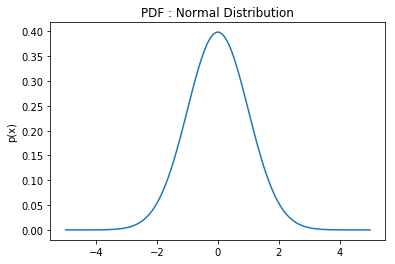

In [9]:
xx = np.linspace(-5, 5, 100)
rv.pdf(xx)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("PDF : Normal Distribution")
plt.show()

In [13]:
np.random.seed(0)
x = rv.rvs(100) # uniform 난수 100개 추출

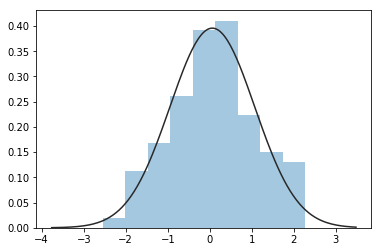

In [15]:
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

### Q-Q plot

데이터가 정규분포인지 아닌지 판단을 **시각적**으로 해보자  

- Q-Q plot은 scatterplot 형태.
- 각 점들이 이루는 선이 직선이라면, 정규분포에 가깝다
- 휘어져있으면 정규분포라고 할 수 없다

(방법)  
동일 분위수에 해당하는 주어진 샘플의 분포 값과 정규분포 값을 한 쌍으로 만들어 scappter plot으로 점을 찍는다.
    1. 샘플 데이터를 크기에 따라 sorting
    2. (?) 각 샘플 데이터의 분위함수 (quantile function) 값을 구한다.
    3. (?) 각 샘플 데이터의 분위함수 값이 정규분포의 cdf값이 되는 정규분포의 값을 구한다.
    4. 샘플 데이터와 그에 대응하는 정규분포값을 쌍으로 연결, 2차원 공간에 점을 찍는다.
    5. 모든 샘플 데이터에 적용.

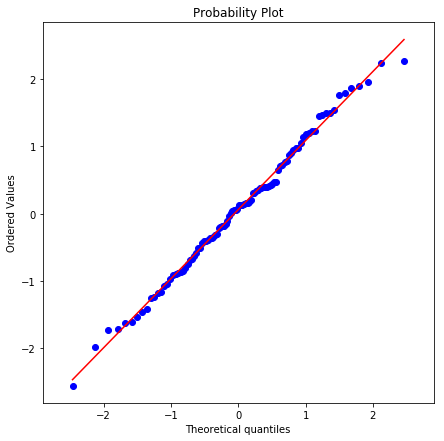

In [16]:
np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

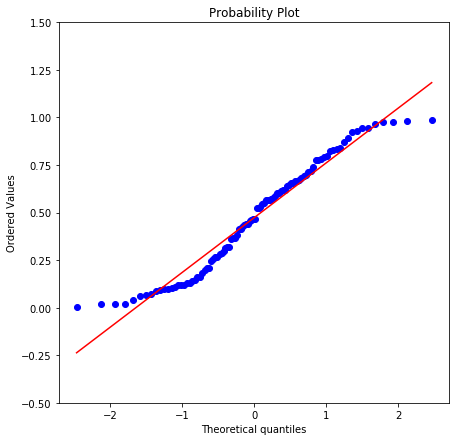

In [17]:
# 정규분포를 따르지 않는 데이터 샘플의 Q-Qplot
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

### 중심 극한 정리 (Central Limit Theorum)
확률 변수의 합이 정규 분포와 비슷한 분포를 이루는 현상



서로 독립인 여러 확률 변수의 기대값($\mu$과 분포$\sigma^2$의 값이 같을 때, (분포의 모양은 달라도 상관 없다)
    
정규화된 샘플 평균의 분포는  n이 증가할 수록 표준 정규 분포에 수렴한다.

$$\dfrac{\bar{X}_n - \mu}{\dfrac{\sigma}{\sqrt{n}}} \xrightarrow{d}\ \mathcal{N}(x;0,1)$$

### 시뮬레이션

더하는 분포의 수가 10개가 될 때, 그 합이 정규 분포에 상당히 가까워짐

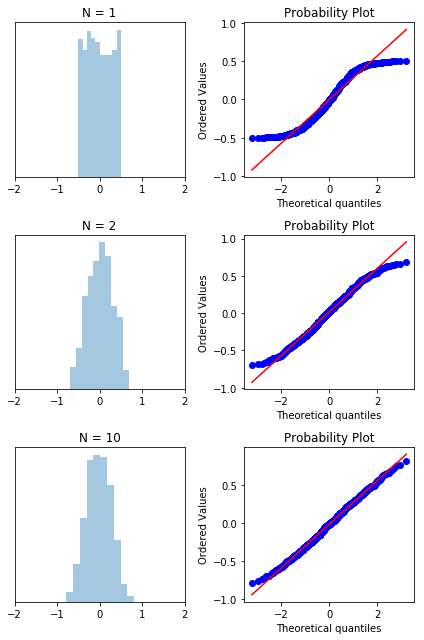

In [19]:
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(1000, N)
    S = (X.sum(axis=1) - 0.5 * N) / np.sqrt(N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(S, bins=10, kde=False, norm_hist=True)
    plt.xlim(-2, 2)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(S, plot=plt)

plt.tight_layout()
plt.show()